In [22]:
from Bio import SeqIO
from Bio import pairwise2
from Bio.Seq import Seq
from matplotlib import pyplot as plt

def load_leishmania_sequences(file):
    # Load Leishmania DNA sequences from a file
    leishmania_sequences = []
    for record in SeqIO.parse(file, "fasta"):
        leishmania_sequences.append(str(record.seq))
    return leishmania_sequences


def identify_leishmania_disease(sequence, leishmania_sequences):
    input_seq = SeqIO.SeqRecord(Seq(sequence))
    for leishmania_seq in leishmania_sequences:
        leishmania_record = SeqIO.SeqRecord(Seq(leishmania_seq))
        alignment = pairwise2.align.globalxx(input_seq.seq, leishmania_record.seq, one_alignment_only=True)
        threshold_score = len(leishmania_seq) - 2
        for alignment1 in alignment:
            alignment_score = alignment1.score
            if alignment_score >= threshold_score:
                return True
    return False

def count_nucleotides(sequence):
    # Count the number of each nucleotide in the sequence
    counts = {
        "A": 0,
        "C": 0,
        "G": 0,
        "T": 0,
    }

    for nucleotide in sequence:
        if nucleotide in counts:
            counts[nucleotide] += 1

    return counts

def calculate_gc_content(sequence):
    # Calculate the GC content of the sequence
    total_count = len(sequence)
    gc_count = sequence.count('G') + sequence.count('C')
    gc_content = (gc_count / total_count) * 100
    return gc_content


def find_motifs(sequence, motif):
    # Find occurrences of a motif in the sequence
    motif_positions = []
    start = 0
    while start < len(sequence):
        pos = sequence.find(motif, start)
        if pos == -1:
            break
        motif_positions.append(pos)
        start = pos + 1
    return motif_positions


def translate_sequence(sequence):
    # Translate DNA sequence to protein sequence
    coding_dna = Seq(sequence)
    protein_seq = coding_dna.translate()
    return protein_seq

In [2]:
input_sequence = load_leishmania_sequences("input_human.fasta")
motif_to_find = "AGGC"  
leishmania_sequences = load_leishmania_sequences("leishmanaia.fasta")
print(leishmania_sequences)
print(input_sequence)

['AGAGCCTAGGGTCTCTCTGCATTCTCT', 'GACAGTAATTCTGAAGCTGCCATGTCC', 'AGAGACCTACCTGAGTGAGAAGATCCC', 'GATCAGAAAGCTGCTACACCTCTGGCA', 'ACCAACATGGAGAAACCCCGTCTCTAC', 'AACTCTGGGCCACCAGAAAGAGGCAGG', 'GCCATGCTCTGGAACAGGGTGGGGGGA', 'GATAGATGGAAAGACTGAGGCTCAAAC', 'CTCTAGGGGATGGCCAAGGCCAGCTGC', 'GTATTTTTAGTAGAGCTGGGGTTTCAC']
['ACGTGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTA', 'TCGATCGATCGATCGATCGATCGATCGATCGATCGATCGAT', 'GCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG', 'ATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGA', 'CTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGC', 'CGATCGATCGATCGATCGATCGATCGATCGATCGATCGATC', 'AGAGCCTAGGGTCTCTCTGCATTCTCTGTTGGGCATCTGTC', 'GATCGATCGATCGATCGATCGATCGATCGATCGATCGATCG', 'CTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGC', 'CGATCGATCGATCGATCGATCGATCGATCGATCGATCGATC']


In [3]:
for i in range(len(input_sequence)):
    nucleotide_counts = count_nucleotides(input_sequence[i])
    print("Nucleotide count of {}:".format(i), nucleotide_counts)

Nucleotide count of 0: {'A': 10, 'C': 10, 'G': 10, 'T': 10}
Nucleotide count of 1: {'A': 10, 'C': 10, 'G': 10, 'T': 11}
Nucleotide count of 2: {'A': 10, 'C': 10, 'G': 11, 'T': 10}
Nucleotide count of 3: {'A': 11, 'C': 10, 'G': 10, 'T': 10}
Nucleotide count of 4: {'A': 10, 'C': 11, 'G': 10, 'T': 10}
Nucleotide count of 5: {'A': 10, 'C': 11, 'G': 10, 'T': 10}
Nucleotide count of 6: {'A': 5, 'C': 11, 'G': 11, 'T': 14}
Nucleotide count of 7: {'A': 10, 'C': 10, 'G': 11, 'T': 10}
Nucleotide count of 8: {'A': 10, 'C': 11, 'G': 10, 'T': 10}
Nucleotide count of 9: {'A': 10, 'C': 11, 'G': 10, 'T': 10}


In [4]:
for i in range(len(input_sequence)):
    gc = []
    gc_content = calculate_gc_content(input_sequence[i])
    gc.append(gc_content)
    print("GC content: {:.2f}%".format(gc_content))


GC content: 50.00%
GC content: 48.78%
GC content: 51.22%
GC content: 48.78%
GC content: 51.22%
GC content: 51.22%
GC content: 53.66%
GC content: 51.22%
GC content: 51.22%
GC content: 51.22%


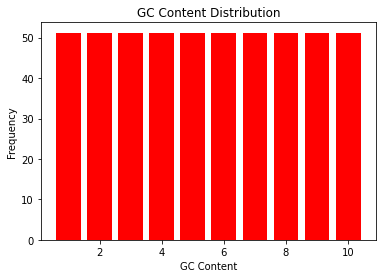

In [5]:
# Assuming you have a list of GC contents for multiple sequences
plt.figure(figsize=(6, 4))
name = [1,2,3,4,5,6,7,8,9,10]
plt.bar(name,gc,color = 'r')
plt.xlabel("GC Content")
plt.ylabel("Frequency")
plt.title("GC Content Distribution")
plt.show()


In [7]:
for i in range(len(input_sequence)):
    protein_sequence = translate_sequence(input_sequence[i])
    print("Protein sequence:", protein_sequence)

Protein sequence: TC*LAS*LAS*LA
Protein sequence: SIDRSIDRSIDRS
Protein sequence: AS*LAS*LAS*LA
Protein sequence: IDRSIDRSIDRSI
Protein sequence: LAS*LAS*LAS*L
Protein sequence: RSIDRSIDRSIDR
Protein sequence: RA*GLSAFSVGHL
Protein sequence: DRSIDRSIDRSID
Protein sequence: LAS*LAS*LAS*L
Protein sequence: RSIDRSIDRSIDR


In [8]:
for i in range(len(input_sequence)):
    is_leishmania = identify_leishmania_disease(input_sequence[i], leishmania_sequences)

    if is_leishmania:
        print("Leishmania disease detected!")
    else:
        print("No evidence of Leishmania disease.")

No evidence of Leishmania disease.
No evidence of Leishmania disease.
No evidence of Leishmania disease.
No evidence of Leishmania disease.
No evidence of Leishmania disease.
No evidence of Leishmania disease.
Leishmania disease detected!
No evidence of Leishmania disease.
No evidence of Leishmania disease.
No evidence of Leishmania disease.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics

In [26]:
df = pd.read_csv("Lesihmania.csv")

In [27]:
df.head(10)


,age,fever,creatinine_phosphokinase,weight_loss,ejection_fraction,Liver_swelling,platelets,serum_creatinine,serum_sodium,Fatigue,Abnormal_blood_tests,time,Leishmania_predict
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [28]:
print("shape :",df.shape)
df.info()

shape : (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   fever                     299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   weight_loss               299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   Liver_swelling            299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   Fatigue                   299 non-null    int64  
 10  Abnormal_blood_tests      299 non-null    int64  
 11  time                      299 non-null    int64  
 12  Leishmania_predict        299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [29]:
df.corr()

,age,fever,creatinine_phosphokinase,weight_loss,ejection_fraction,Liver_swelling,platelets,serum_creatinine,serum_sodium,Fatigue,Abnormal_blood_tests,time,Leishmania_predict
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
fever,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
weight_loss,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
Liver_swelling,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
Fatigue,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [30]:
x=df.drop(['Leishmania_predict'], axis=1)
x

,age,fever,creatinine_phosphokinase,weight_loss,ejection_fraction,Liver_swelling,platelets,serum_creatinine,serum_sodium,Fatigue,Abnormal_blood_tests,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [31]:
y=df.Leishmania_predict
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: Leishmania_predict, Length: 299, dtype: int64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
st_x = StandardScaler()
x_train2 = st_x.fit_transform(x_train)
x_test2 = st_x.fit_transform(x_test)
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')
knn.fit(x_train2,y_train)
y_predict = knn.predict(x_test2)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict))
k11 = accuracy_score(y_test,y_predict)*100
k22 = recall_score(y_test,y_predict,average = 'macro')*100
k33 = precision_score(y_test,y_predict,average='macro')*100
k44 = f1_score(y_test,y_predict,average='macro')*100


Confusion Matrix
[[44  2]
 [ 7  7]]


In [33]:
print(y_predict)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]


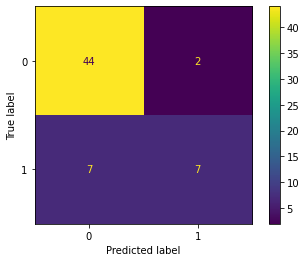

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_predict))
cm_display.plot()
plt.show()

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.78      0.50      0.61        14

    accuracy                           0.85        60
   macro avg       0.82      0.73      0.76        60
weighted avg       0.84      0.85      0.84        60



In [36]:
print("Accuracy :",k11)
print("Recall:",k22)
print("Precision_Score:",k33)
print("F1_Score:",k44)

Accuracy : 85.0
Recall: 72.82608695652173
Precision_Score: 82.02614379084967
F1_Score: 75.79560735096369


In [37]:
y = knn.predict([[75,0,582,0,20,1,265000.00,1.9,130,1,0,4]])
print(y)

[0]


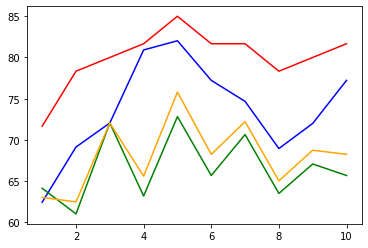

In [38]:
a = []
p = []
r = []
f = []
xc =[1,2,3,4,5,6,7,8,9,10]
for i in range(1,11):
    st_x = StandardScaler()
    x_train2 = st_x.fit_transform(x_train)
    x_test2 = st_x.fit_transform(x_test)
    knn = KNeighborsClassifier(n_neighbors = i,metric = 'euclidean')
    knn.fit(x_train2,y_train)
    y_predict = knn.predict(x_test2)
    k1 = accuracy_score(y_test,y_predict)*100
    k2 = recall_score(y_test,y_predict,average = 'macro')*100
    k3 = precision_score(y_test,y_predict,average='macro')*100
    k4 = f1_score(y_test,y_predict,average='macro')*100
    a.append(k1)
    p.append(k3)
    r.append(k2)
    f.append(k4)
plt.plot(xc,a,color='red')
plt.plot(xc,p,color='blue')
plt.plot(xc,r,color='green')
plt.plot(xc,f,color='orange')

In [39]:
x_train3 = st_x.fit_transform(x_train)
x_test3 = st_x.fit_transform(x_test)
svn = SVC(kernel = 'linear')
svn.fit(x_train3,y_train)
y_predict1 = svn.predict(x_test3)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict1))
s11 = accuracy_score(y_test,y_predict1)*100
s22 = recall_score(y_test,y_predict1,average = 'macro')*100
s33 = precision_score(y_test,y_predict1,average = 'macro')*100
s44 = f1_score(y_test,y_predict1,average = 'macro')*100

Confusion Matrix
[[40  6]
 [ 2 12]]


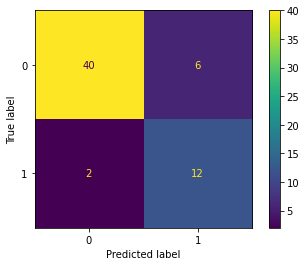

In [40]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_predict1))
cm_display.plot()
plt.show()

In [41]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.67      0.86      0.75        14

    accuracy                           0.87        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.89      0.87      0.87        60



In [42]:
print("Accuracy :",s11)
print("Recall:",s22)
print("Precision_Score:",s33)
print("F1_Score:",s44)


Accuracy : 86.66666666666667
Recall: 86.33540372670807
Precision_Score: 80.95238095238095
F1_Score: 82.95454545454545


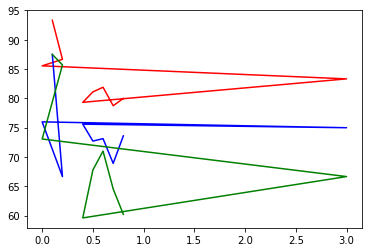

In [43]:
x=df.drop(['Leishmania_predict'], axis=1)
y=df.Leishmania_predict
xb = [0.1,0.2,0,3,0.4,0.5,0.6,0.7,0.8]
a1=[]
r1=[]
p1=[]
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = i/10,random_state = 1)
    st_x = StandardScaler()
    x_train3 = st_x.fit_transform(x_train)
    x_test3 = st_x.fit_transform(x_test)
    svn = SVC(kernel = 'linear',random_state = 0)
    svn.fit(x_train3,y_train)
    y_predict1 = svn.predict(x_test3)
    s1 = accuracy_score(y_test,y_predict1)*100
    s2 = recall_score(y_test,y_predict1)*100
    s3 = precision_score(y_test,y_predict1)*100
    a1.append(s1)
    p1.append(s3)
    r1.append(s2)
plt.plot(xb,a1,color='red')
plt.plot(xb,p1,color='blue')
plt.plot(xb,r1,color='green')


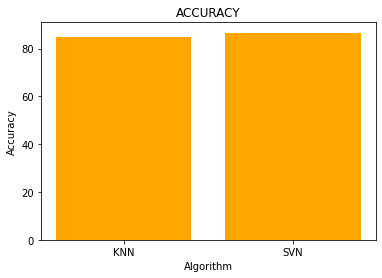

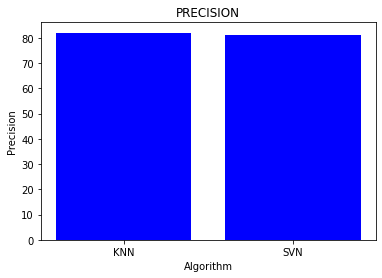

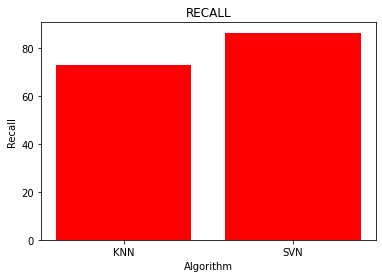

In [44]:
Class = ["KNN","SVN"]
Acc = [k11,s11]
plt.bar(Class,Acc,color='orange')
plt.title("ACCURACY")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()


Class1 = ["KNN","SVN"]
pre = [k33,s33]
plt.bar(Class1,pre,color='blue')
plt.title("PRECISION")
plt.xlabel("Algorithm")
plt.ylabel("Precision")
plt.show()

Class2 = ["KNN","SVN"]
re = [k22,s22]
plt.bar(Class2,re,color='red')
plt.title("RECALL")
plt.xlabel("Algorithm")
plt.ylabel("Recall")
plt.show()